# Inheritance of Distribution to the Gaussian and Binomial Classes

To give another example of inheritance, take a look at the code in this Jupyter notebook. The Gaussian distribution code is refactored into a generic Distribution class and a Gaussian distribution class. Read through the code in this Jupyter notebook to see how the code works.

The Distribution class takes care of the initialization and the read_data_file method. Then the rest of the Gaussian code is in the Gaussian class. You'll later use this Distribution class in an exercise at the end of the lesson.

Run the code in each cell of this Jupyter notebook. This is a code demonstration, so you do not need to write any code.

In [1]:
class Distribution:
    
    def __init__(self, mu=0, sigma=1):
    
        """ Generic distribution class for calculating and 
        visualizing a probability distribution.
    
        Attributes:
            mean (float) representing the mean value of the distribution
            stdev (float) representing the standard deviation of the distribution
            data_list (list of floats) a list of floats extracted from the data file
            """
        
        self.mean = mu
        self.stdev = sigma
        self.data = []


    def read_data_file(self, file_name):
    
        """Function to read in data from a txt file. The txt file should have
        one number (float) per line. The numbers are stored in the data attribute.
                
        Args:
            file_name (string): name of a file to read from
        
        Returns:
            None
        
        """
            
        with open(file_name) as file:
            data_list = []
            line = file.readline()
            while line:
                data_list.append(int(line))
                line = file.readline()
        file.close()
    
        self.data = data_list

In [2]:
import math
import matplotlib.pyplot as plt
#from .Generaldistribution import Distribution

class Gaussian(Distribution):
    """ Gaussian distribution class for calculating and visualizing a Gaussian distribution.
    
    Attributes:
        mean (float) representing the mean value of the distribution
        stdev (float) representing the standard deviation of the distribution
        data_list (list of floats) a list of floats extracted from the data file
            
    """
    def __init__(self, mu=0, sigma=1):
        
        Distribution.__init__(self, mu, sigma)
       
    
    def calculate_mean(self):
        """Function to calculate the mean of the data set.
        Args: 
            None
        
        Returns: 
            float: mean of the data set
        """
        avg = 1.0 * sum(self.data) / len(self.data)
        self.mean = avg
        return self.mean

    def calculate_stdev(self, sample=True):
        """Function to calculate the standard deviation of the data set.
        Args: 
            sample (bool): whether the data represents a sample or population
        Returns: 
            float: standard deviation of the data set
        """

        if sample:
            n = len(self.data) - 1
        else:
            n = len(self.data)
    
        mean = self.calculate_mean()
    
        sigma = 0
    
        for d in self.data:
            sigma += (d - mean) ** 2
        
        sigma = math.sqrt(sigma / n)
    
        self.stdev = sigma
        
        return self.stdev
        
    def plot_histogram(self):
        """Function to output a histogram of the instance variable data using 
        matplotlib pyplot library.
        Args:
            None
        Returns:
            None
        """
        plt.hist(self.data)
        plt.title('Histogram of Data')
        plt.xlabel('data')
        plt.ylabel('count')
        
    def pdf(self, x):
        """Probability density function calculator for the gaussian distribution.
        
        Args:
            x (float): point for calculating the probability density function
            
        
        Returns:
            float: probability density function output
        """
        
        return (1.0 / (self.stdev * math.sqrt(2*math.pi))) * math.exp(-0.5*((x - self.mean) / self.stdev) ** 2)
        

    def plot_histogram_pdf(self, n_spaces = 50):

        """Function to plot the normalized histogram of the data and a plot of the 
        probability density function along the same range
        
        Args:
            n_spaces (int): number of data points 
        
        Returns:
            list: x values for the pdf plot
            list: y values for the pdf plot
            
        """
        min_range = min(self.data)
        max_range = max(self.data)
        
         # calculates the interval between x values
        interval = 1.0 * (max_range - min_range) / n_spaces

        x = []
        y = []
        
        # calculate the x values to visualize
        for i in range(n_spaces):
            tmp = min_range + interval*i
            x.append(tmp)
            y.append(self.pdf(tmp))

        # make the plots
        fig, axes = plt.subplots(2,sharex=True)
        fig.subplots_adjust(hspace=.5)
        axes[0].hist(self.data, density=True)
        axes[0].set_title('Normed Histogram of Data')
        axes[0].set_ylabel('Density')

        axes[1].plot(x, y)
        axes[1].set_title('Normal Distribution for \n Sample Mean and Sample Standard Deviation')
        axes[0].set_ylabel('Density')
        plt.show()

        return x, y
        
    def __add__(self, other):
        """Function to add together two Gaussian distributions
        Args:
            other (Gaussian): Gaussian instance
        Returns:
            Gaussian: Gaussian distribution
        """
        result = Gaussian()
        result.mean = self.mean + other.mean
        result.stdev = math.sqrt(self.stdev ** 2 + other.stdev ** 2)
        return result
        
    def __repr__(self):
        """Function to output the characteristics of the Gaussian instance
        Args:
            None
        Returns:
            string: characteristics of the Gaussian
        """
        return "mean {}, standard deviation {}".format(self.mean, self.stdev)

In [3]:
# Any changes to the distributions library should be reinstalled with
#  pip install --upgrade .

# For running unit tests, use
# /usr/bin/python -m unittest test

import unittest
#from distributions import Gaussian

class TestGaussianClass(unittest.TestCase):
    def setUp(self):
        self.gaussian = Gaussian(25, 2)
        self.gaussian.read_data_file('data/Python20_numbers.txt')

    def test_initialization(self): 
        self.assertEqual(self.gaussian.mean, 25, 'incorrect mean')
        self.assertEqual(self.gaussian.stdev, 2, 'incorrect standard deviation')

    def test_readdata(self):
        self.assertEqual(self.gaussian.data,\
         [1, 3, 99, 100, 120, 32, 330, 23, 76, 44, 31], 'data not read in correctly')

    def test_meancalculation(self):
        self.assertEqual(self.gaussian.calculate_mean(),\
         sum(self.gaussian.data) / float(len(self.gaussian.data)), 'calculated mean not as expected')

    def test_stdevcalculation(self):
        self.assertEqual(round(self.gaussian.calculate_stdev(), 2), 92.87, 'sample standard deviation incorrect')
        self.assertEqual(round(self.gaussian.calculate_stdev(0), 2), 88.55, 'population standard deviation incorrect')

    def test_pdf(self):
        self.assertEqual(round(self.gaussian.pdf(25), 5), 0.19947,\
         'pdf function does not give expected result') 
        self.gaussian.calculate_mean()
        self.gaussian.calculate_stdev()
        self.assertEqual(round(self.gaussian.pdf(75), 5), 0.00429,\
        'pdf function after calculating mean and stdev does not give expected result')      

    def test_add(self):
        gaussian_one = Gaussian(25, 3)
        gaussian_two = Gaussian(30, 4)
        gaussian_sum = gaussian_one + gaussian_two
        
        self.assertEqual(gaussian_sum.mean, 55)
        self.assertEqual(gaussian_sum.stdev, 5)

if __name__ == '__main__':
#    unittest.main()    
    tests = TestGaussianClass()
    tests_loaded = unittest.TestLoader().loadTestsFromModule(tests)
    unittest.TextTestRunner().run(tests_loaded)

......
----------------------------------------------------------------------
Ran 6 tests in 0.016s

OK


In [4]:
# initialize two gaussian distributions
gaussian_one = Gaussian(25, 3)
gaussian_two = Gaussian(30, 2)

# initialize a third gaussian distribution reading in a data efile
gaussian_three = Gaussian()
gaussian_three.read_data_file('data/Python20_numbers.txt')
gaussian_three.calculate_mean()
gaussian_three.calculate_stdev()

92.87459776004906

In [5]:
# print out the mean and standard deviations
print(gaussian_one.mean)
print(gaussian_two.mean)

print(gaussian_one.stdev)
print(gaussian_two.stdev)

print(gaussian_three.mean)
print(gaussian_three.stdev)

25
30
3
2
78.0909090909091
92.87459776004906


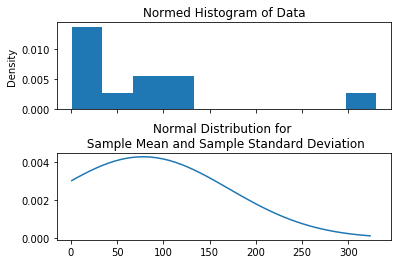

([1.0,
  7.58,
  14.16,
  20.740000000000002,
  27.32,
  33.9,
  40.480000000000004,
  47.06,
  53.64,
  60.22,
  66.8,
  73.38,
  79.96000000000001,
  86.54,
  93.12,
  99.7,
  106.28,
  112.86,
  119.44,
  126.02,
  132.6,
  139.18,
  145.76,
  152.34,
  158.92000000000002,
  165.5,
  172.08,
  178.66,
  185.24,
  191.82,
  198.4,
  204.98,
  211.56,
  218.14000000000001,
  224.72,
  231.3,
  237.88,
  244.46,
  251.04,
  257.62,
  264.2,
  270.78000000000003,
  277.36,
  283.94,
  290.52,
  297.1,
  303.68,
  310.26,
  316.84000000000003,
  323.42],
 [0.0030436941280150395,
  0.0032199635775976665,
  0.003389385629106679,
  0.0035498588092989685,
  0.0036993144412822716,
  0.0038357605437130374,
  0.003957325730527453,
  0.004062301768846044,
  0.004149183447609647,
  0.004216704458941581,
  0.004263868097796145,
  0.004289971740008139,
  0.004294624258609417,
  0.004277755775037969,
  0.0042396194054553134,
  0.004180784941175556,
  0.004102124683731816,
  0.004004791926750454,
  0

In [6]:
# plot histogram of gaussian three
gaussian_three.plot_histogram_pdf()

In [7]:
# add gaussian_one and gaussian_two together
gaussian_one + gaussian_two

mean 55, standard deviation 3.605551275463989

In [8]:
import math
import matplotlib.pyplot as plt
#from .Generaldistribution import Distribution

class Binomial(Distribution):
    """ Binomial distribution class for calculating and visualizing a Binomial distribution.
    Attributes:
        mean (float) representing the mean value of the distribution
        stdev (float) representing the standard deviation of the distribution
        data_list (list of floats) a list of floats to be extracted from the data file
        p (float) representing the probability of an event occurring
        n (int) number of trials
    """
    
    def __init__(self, prob=.5, size=20):
        self.n = size
        self.p = prob
        Distribution.__init__(self, self.calculate_mean(), self.calculate_stdev())
    
    def calculate_mean(self):
        """Function to calculate the mean from p and n
        Args: 
            None
        Returns: 
            float: mean of the data set
        """
        self.mean = self.p * self.n
        return self.mean

    def calculate_stdev(self):
        """Function to calculate the standard deviation from p and n.
        Args: 
            None
        Returns: 
            float: standard deviation of the data set
        """
        self.stdev = math.sqrt(self.n * self.p * (1 - self.p))
        return self.stdev
        
    def replace_stats_with_data(self):
        """Function to calculate p and n from the data set
        Args: 
            None
        Returns: 
            float: the p value
            float: the n value
        """
        self.n = len(self.data)
        self.p = 1.0 * sum(self.data) / len(self.data)
        self.mean = self.calculate_mean()
        self.stdev = self.calculate_stdev()
        return self.p, self.n
        
    def plot_bar(self):
        """Function to output a histogram of the instance variable data using 
        matplotlib pyplot library.
        Args:
            None
        Returns:
            None
        """
        plt.bar(x = ['0', '1'], height = [(1 - self.p) * self.n, self.p * self.n])
        plt.title('Bar Chart of Data')
        plt.xlabel('outcome')
        plt.ylabel('count')
        
    def pdf(self, k):
        """Probability density function calculator for the binomial distribution.
        Args:
            x (float): point for calculating the probability density function
        Returns:
            float: probability density function output
        """
        a = math.factorial(self.n) / (math.factorial(k) * (math.factorial(self.n - k)))
        b = (self.p ** k) * (1 - self.p) ** (self.n - k)
        return a * b

    def plot_bar_pdf(self):
        """Function to plot the pdf of the binomial distribution
        Args:
            None
        Returns:
            list: x values for the pdf plot
            list: y values for the pdf plot
        """
        x = []
        y = []
        
        # calculate the x values to visualize
        for i in range(self.n + 1):
            x.append(i)
            y.append(self.pdf(i))

        # make the plots
        plt.bar(x, y)
        plt.title('Distribution of Outcomes')
        plt.ylabel('Probability')
        plt.xlabel('Outcome')

        plt.show()

        return x, y
        
    def __add__(self, other):
        """Function to add together two Binomial distributions with equal p
        Args:
            other (Binomial): Binomial instance
        Returns:
            Binomial: Binomial distribution
        """
        try:
            assert self.p == other.p, 'p values are not equal'
        except AssertionError as error:
            raise
        
        result = Binomial()
        result.n = self.n + other.n
        result.p = self.p
        result.calculate_mean()
        result.calculate_stdev()
        
        return result
        
    def __repr__(self):
        """Function to output the characteristics of the Binomial instance
        Args:
            None
        Returns:
            string: characteristics of the Gaussian
        """
        return "mean {}, standard deviation {}, p {}, n {}".\
        format(self.mean, self.stdev, self.p, self.n)

In [9]:
# Any changes to the distributions library should be reinstalled with
#  pip install --upgrade .

# For running unit tests, use
# /usr/bin/python -m unittest test

import unittest
#from distributions import Binomial
    
class TestBinomialClass(unittest.TestCase):
    def setUp(self):
        self.binomial = Binomial(0.4, 20)
        self.binomial.read_data_file('data/Python20_numbers_binomial.txt')

    def test_initialization(self):
        self.assertEqual(self.binomial.p, 0.4, 'p value incorrect')
        self.assertEqual(self.binomial.n, 20, 'n value incorrect')

    def test_readdata(self):
        self.assertEqual(self.binomial.data,\
         [0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0], 'data not read in correctly')
    
    def test_calculatemean(self):
        mean = self.binomial.calculate_mean()
        self.assertEqual(mean, 8)
    
    def test_calculatestdev(self):
        stdev = self.binomial.calculate_stdev()
        self.assertEqual(round(stdev,2), 2.19)
        
    def test_replace_stats_with_data(self):
        p, n = self.binomial.replace_stats_with_data()
        self.assertEqual(round(p,3), .615)
        self.assertEqual(n, 13)
        
    def test_pdf(self):
        self.assertEqual(round(self.binomial.pdf(5), 5), 0.07465)
        self.assertEqual(round(self.binomial.pdf(3), 5), 0.01235)
    
        self.binomial.replace_stats_with_data()
        self.assertEqual(round(self.binomial.pdf(5), 5), 0.05439)
        self.assertEqual(round(self.binomial.pdf(3), 5), 0.00472)

    def test_add(self):
        binomial_one = Binomial(.4, 20)
        binomial_two = Binomial(.4, 60)
        binomial_sum = binomial_one + binomial_two
        
        self.assertEqual(binomial_sum.p, .4)
        self.assertEqual(binomial_sum.n, 80)

if __name__ == '__main__':
#    unittest.main()
    tests = TestBinomialClass()
    tests_loaded = unittest.TestLoader().loadTestsFromModule(tests)
    unittest.TextTestRunner().run(tests_loaded)

.......
----------------------------------------------------------------------
Ran 7 tests in 0.028s

OK


In [10]:
# initialize two binomial distributions
binomial_one = Binomial(.4, 20)
binomial_two = Binomial(.4, 60)

# initialize a third gaussian distribution reading in a data efile
binomial_three = Gaussian()
binomial_three.read_data_file('data/Python20_numbers_binomial.txt')
binomial_three.calculate_mean()
binomial_three.calculate_stdev()

# print out the mean and standard deviations
print(binomial_one.mean)
print(binomial_two.mean)

print(binomial_one.stdev)
print(binomial_two.stdev)

print(binomial_three.mean)
print(binomial_three.stdev)

8.0
24.0
2.1908902300206643
3.794733192202055
0.6153846153846154
0.5063696835418333


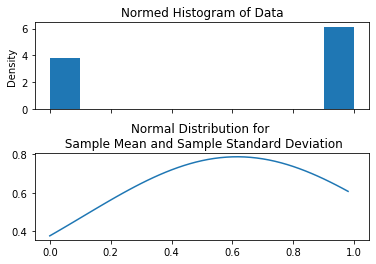

([0.0,
  0.02,
  0.04,
  0.06,
  0.08,
  0.1,
  0.12,
  0.14,
  0.16,
  0.18,
  0.2,
  0.22,
  0.24,
  0.26,
  0.28,
  0.3,
  0.32,
  0.34,
  0.36,
  0.38,
  0.4,
  0.42,
  0.44,
  0.46,
  0.48,
  0.5,
  0.52,
  0.54,
  0.56,
  0.58,
  0.6,
  0.62,
  0.64,
  0.66,
  0.68,
  0.7000000000000001,
  0.72,
  0.74,
  0.76,
  0.78,
  0.8,
  0.8200000000000001,
  0.84,
  0.86,
  0.88,
  0.9,
  0.92,
  0.9400000000000001,
  0.96,
  0.98],
 [0.37647192794296874,
  0.3946753325003832,
  0.4131139586704309,
  0.43173996920700697,
  0.45050243578590266,
  0.4693475242325551,
  0.48821871107507714,
  0.507057030715675,
  0.5258013521426803,
  0.5443886837327478,
  0.5627545043235483,
  0.5808331183769216,
  0.5985580327064383,
  0.6158623519170727,
  0.6326791894035884,
  0.6489420904833371,
  0.6645854640033306,
  0.6795450185650027,
  0.6937581993569664,
  0.7071646214795947,
  0.7197064955880782,
  0.7313290416747099,
  0.7419808868577,
  0.7516144431432348,
  0.760186261279333,
  0.7676573570230

In [11]:
# plot histogram of gaussian three
binomial_three.plot_histogram_pdf()

In [12]:
# add binomial_one and binomial_two together
binomial_one + binomial_two

mean 32.0, standard deviation 4.381780460041329, p 0.4, n 80